<a href="https://colab.research.google.com/github/MorganDaviesEcon/MorganDaviesEcon.github.io/blob/main/Task9_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the usuals for machine learning
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [ ]:
# Import breast cancer dataset
cancer = load_breast_cancer()

In [ ]:
# Check Dimensions of the data
cancer.data.shape

(569, 30)

In [ ]:
# Features which make up a diagnosis
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# Conclusion from those features
print(cancer.target_names)

['malignant' 'benign']


Start KNN Classification

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
X, y = cancer.data, cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

133 / 143 correct


In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9300699300699301

In [ ]:
for n_neighbors in [1, 5, 10, 20, 30,40,50,60,70,80]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    print(n_neighbors, knn.score(X_test, y_test))

1 0.9300699300699301
5 0.9300699300699301
10 0.9230769230769231
20 0.9230769230769231
30 0.9090909090909091
40 0.916083916083916
50 0.9090909090909091
60 0.9090909090909091
70 0.9020979020979021
80 0.9020979020979021


In [ ]:
from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_cancer_knn():
    cancer = datasets.load_breast_cancer()
    X = cancer.data[:, 0:2]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
                #try 2:4 
    y = cancer.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=1) #Try changing the number of neighbors
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('mean radius')
    pl.ylabel('mean texture')
    pl.axis('tight')

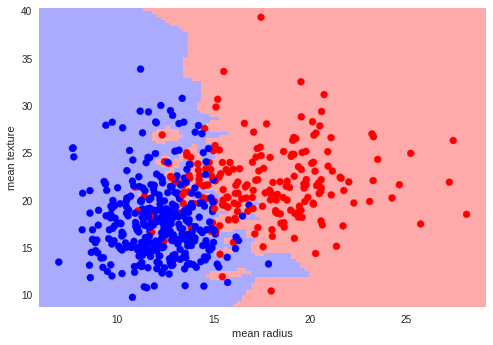

In [ ]:
# plot the classification onto a diagram using mean texture and mean radius
plot_cancer_knn()

plt.savefig('W10cancer_knn.png',transparent=True)

Dimensionality reduction of the same dataset

In [ ]:
from sklearn.decomposition import PCA #import the PCA model from the decomposition model collection. Same syntax as before, but we don't have a y!
pca = PCA(n_components=2) # Create PCA model. Need to specify number of components. We will use 2, in order to be able to plot them in 2D space. n_components is a hyperparameter of the PCA model 
pca.fit(X)
X_reduced = pca.transform(X) #Dimensionality reduction models have a special function called transform, where you transform the data into the new 2 dimensions from the old 4. This changes the shape of your data!
print("Original dataset shape:",X.shape, "Reduced dataset shape:", X_reduced.shape)

Original dataset shape: (569, 30) Reduced dataset shape: (569, 2)


In [ ]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
pd.DataFrame(X_reduced)

,0,1
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742
...,...,...
564,1414.126684,110.222492
565,1045.018854,77.057589
566,314.501756,47.553525
567,1124.858115,34.129225


In [ ]:
pd.DataFrame(X_reduced,y)

,0,1
0,1160.142574,-293.917544
0,1269.122443,15.630182
0,995.793889,39.156743
0,-407.180803,-67.380320
0,930.341180,189.340742
...,...,...
0,1414.126684,110.222492
0,1045.018854,77.057589
0,314.501756,47.553525
0,1124.858115,34.129225


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 